<center><u><H1>Ensemble Learning</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load the data:

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

## Preprocessing the data:

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2019)

In [4]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Creating models:

In [5]:
lr = LogisticRegression(C=1.0, solver='lbfgs', multi_class='auto',random_state=2019)
nb = GaussianNB()
svm = SVC(C=1.0, gamma='scale', kernel='rbf', probability=True)
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3)
rf = RandomForestClassifier(n_estimators=500, random_state=2019)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=500, learning_rate=0.05, random_state=2019)
gb = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.05, random_state=2019)
xgb = xgb.XGBClassifier(objective="multi:softprob", 
                        max_depth=3,
                        n_estimators=500,
                        eta=0.1,
                        random_state=2019,
                        )

In [6]:
# Hard voting and Soft voting: 
vc = VotingClassifier(estimators=[('lr', lr), ('nb', nb),
                                  ('svm', svm), ('dt', dt),
                                  ('rf', rf), ('ada', ada),
                                  ('gb', gb), ('xgb', xgb)], voting='soft')

In [7]:
vc.fit(X_train_std, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=2019,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('nb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('svm',
                              SVC(C=1.0, cache_size...
                                            colsample_bytree=1, eta=0.1,
            

## Metrics:

### Cross Validation with different models

In [8]:
clf_labels = ['Logistic Regression','Naive Bayes','Support Vector Machine','Decision Tree',
              'Random Forest', 'AdaBoost', 'Gradient Boost','XGBoost']

In [9]:
for clf, label in zip([lr, nb, svm, dt, rf, ada, gb, xgb], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train_std, y=y_train, cv=10, scoring='accuracy')
    print(f"Accuracy: {scores.mean():0.3f} +/- ({scores.std():0.3f}) {label}")

Accuracy: 0.940 +/- (0.080) Logistic Regression
Accuracy: 0.931 +/- (0.078) Naive Bayes
Accuracy: 0.940 +/- (0.102) Support Vector Machine
Accuracy: 0.913 +/- (0.103) Decision Tree
Accuracy: 0.921 +/- (0.098) Random Forest
Accuracy: 0.913 +/- (0.081) AdaBoost
Accuracy: 0.941 +/- (0.080) Gradient Boost
Accuracy: 0.941 +/- (0.080) XGBoost


### Cross Validation with Voting Classifier

In [10]:
vc_pred = vc.predict(X_test_std)

In [11]:
print(f"Voting Classifier: Test accuracy: {accuracy_score(y_test, vc_pred):.3f}")

Voting Classifier: Test accuracy: 0.978


In [12]:
scores = cross_val_score(vc, X_train_std, y_train, cv=10, scoring='accuracy')
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[1.         1.         0.90909091 1.         1.         1.
 1.         0.9        0.8        0.8       ]


In [13]:
print(f"Cross Val Scores Mean:{scores.mean():0.3f} / Cross Val Scores Std:{scores.std():0.3f}")

Cross Val Scores Mean:0.941 / Cross Val Scores Std:0.080


## Plotting decision boundaries

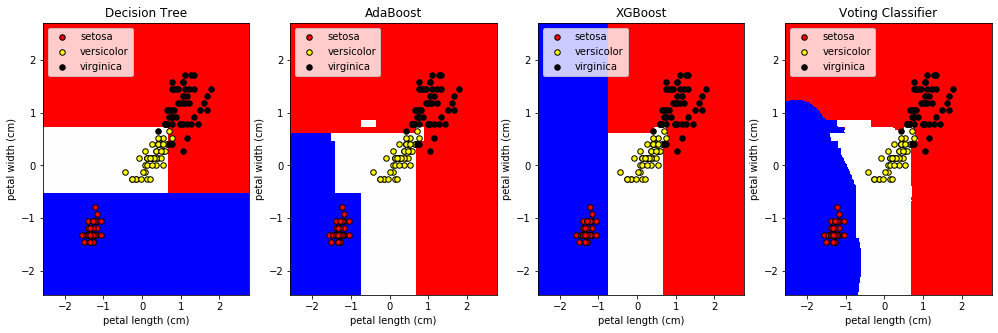

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(17, 5))
n_classes = len(np.unique(y))
plot_colors = ["red","yellow","black"]

res = 0.02
X2D = X_std[:,[2,3]]

x1min, x1max = X2D[:,0].min() -1, X2D[:,0].max() + 1
x2min, x2max = X2D[:,1].min() -1, X2D[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1min,x1max,res),np.arange(x2min,x2max,res))

for clf, ax, title in zip([dt, ada, xgb, vc], axs, ['Decision Tree','AdaBoost','XGBoost', 'Voting Classifier']):
    clf.fit(X2D, y)
    output = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    output = output.reshape(xx1.shape)
    ax.pcolormesh(xx1,xx2, output, cmap=plt.cm.bwr)
    ax.set_xlabel(iris.feature_names[2])
    ax.set_ylabel(iris.feature_names[3])
    ax.set_title(title)  
    
    for cl, color in zip(range(n_classes), plot_colors):  
        ax.scatter(X2D[y==cl, 0], X2D[y==cl, 1], s=30, marker='o', c=color, edgecolor='k', label=iris.target_names[cl])
        ax.legend(loc='best', fancybox=True)

## References:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html